In [1]:
# Let's start with Sentimental and Topic Analysis before finding our micro_influencer.
# Note, plese downnload these attached png to get same wordclouds: adidas.png, nike.png, brain.png, twitter.png
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Let's open the data downloaded from twitter 
Nike_tweets_data=pd.read_csv("Nike_tweets_data.csv")

In [3]:
Nike_tweets_data

Unnamed: 0            author_id     author_name     screen_name  \
0              0           1006569229  Timothy Nelson   TimdianaJones   
1              1            131021774     Jedi Dre...      2Tanks_DRE   
2              2   939797227542859776        Karabo 🅴        Glaya_KM   
3              3            174756626            Kate    kateklewicki   
4              4           2439998796          ʙʟᴀɴᴄᴏ      _treblanco   
...          ...                  ...             ...             ...   
5430        5431            708827897       Emjay1900      Its_Deenee   
5431        5432   825356567239327744          Spatsu       SpatsuApp   
5432        5433            566748330        yfueputa           xMD0_   
5433        5434  1343708107789242374        daxter 🍻  oliverthekingg   
5434        5435            104983587           Drama   TheyHateDrama   

      verification                                        description  \
0            False                                   From Kansas City   
1            False  I can get Chick-Fil-A on Sundays \r\n\r\n#LAFC...   
2            False  Graphic Designer | Photographer | Digital arti...   
3            False                       Always trying to do better..   
4            False     ᴀʀɪᴢᴏɴᴀ sᴛᴀᴛᴇ 🔱🎓| ɪɴsᴛᴀ: @_treblanco | ʀɪᴘ ⚫️🐍   
...            ...                                                ...   
5430         False  ..I'm nothing but a no of days, sooner or late...   
5431         False  SPORT - ATHLETE - SUCCESS. Spatsu is an applic...   
5432         False  I'm as dope as the dope on a scale in a drug s...   
5433         False                @OlivesNoThx my priv🧟‍♂️ #slytherin   
5434         False   Everybody dead or locked up.. I survived 🧎🏿‍♂️🤲🏾   

                        location  followers_count  friends_count  \
0                            NaN              128            963   
1                  The District              2474            438   
2     Johannesburg, South Africa             1147            819   
3                     Denver, CO               42            168   
4               Scottsdale, AZ 📍              519            217   
...                          ...              ...            ...   
5430               Kano, Nigeria             3228           3419   
5431                         NaN               14             17   
5432                  Antarctica              355            103   
5433                       HeHim             1490           1475   
5434                    Fly zone             2333           2555   

      listed_count  favourites_count  statuses_count  author_lang  \
0                0             50285           12795          NaN   
1               72              1541          538057          NaN   
2               22             86446           91159          NaN   
3                0                11            1849          NaN   
4                0               200            2626          NaN   
...            ...               ...             ...          ...   
5430             0             17848           16355          NaN   
5431             0                 5            1715          NaN   
5432             1              4454           14671          NaN   
5433            34              3915           59948          NaN   
5434           130               660           52038          NaN   

                     created_at  \
0     2022-04-29 23:04:24+00:00   
1     2022-04-29 23:04:23+00:00   
2     2022-04-29 23:04:22+00:00   
3     2022-04-29 23:04:14+00:00   
4     2022-04-29 23:04:09+00:00   
...                         ...   
5430  2022-04-20 20:59:01+00:00   
5431  2022-04-20 20:44:09+00:00   
5432  2022-04-20 19:43:24+00:00   
5433  2022-04-20 18:16:15+00:00   
5434  2022-04-20 17:42:32+00:00   

                                                   text  retweet_count  \
0     @OhLookItsRaab @nikefootball @Nike Transform i...              0   
1     RT @snkr_twitr: Nike Air Force 

In [4]:
# Droppoing duplicate rows.
Nike_tweets_data.drop_duplicates(inplace=True)

In [5]:
# let's check unique twitter accounts commenting on Nike
Nike_tweets_data.screen_name.nunique()

4162

In [6]:
# Let's check null values in rows
Nike_tweets_data.isnull().sum(axis=0)

Unnamed: 0                   0
author_id                    0
author_name                  0
screen_name                  0
verification                 0
description                730
location                  1919
followers_count              0
friends_count                0
listed_count                 0
favourites_count             0
statuses_count               0
author_lang               5435
created_at                   0
text                         0
retweet_count                0
entities_get_hashtages       0
source                       0
fav_count                    0
dtype: int64

In [7]:
# Creating a copy of original dat frame to perform ohter options and preserving origianl data file.
Nike_df1=Nike_tweets_data.copy()

In [8]:
# Dropping author_lang column because it consits of numm values: twitter did not provide author language information.
Nike_df1=Nike_df1.drop(columns='author_lang')

In [9]:
# See one column has already reduced.
Nike_df1.shape

(5435, 18)

In [10]:
# Let's check the location of most of the tweets
Nike_df1['location'].value_counts()

United States         107
Boise, ID              70
Los Angeles, CA        43
California, USA        37
Nairobi, Kenya         36
                     ... 
West Oakland,CA 📍       1
Chattanooga, TN         1
Anywhere God Is         1
The Internet & NYC      1
Fly zone                1
Name: location, Length: 1877, dtype: int64

In [11]:
# Let's check the total numbe of location
# Following resuls shwo 1876. Since location data has both city and country nmaes, it is confusing to see how many tweets wrere generated form each conuntry.

Nike_df1.location.nunique()

1877

In [12]:
# let's check the total number of unique user_ids
Nike_df1['screen_name'].value_counts(sort=True)

kent_nike          60
Hoops227_NFL       33
snkr_twitr         33
AntraDrip          30
hurroharra         29
                   ..
susantu65957371     1
BabajideShodiy4     1
chttpn_             1
MoneyTris10         1
TheyHateDrama       1
Name: screen_name, Length: 4162, dtype: int64

In [13]:
# As can be seen above, kent_nike is an account which tweeted the most. Let's explre about this account? Can it be a company account? Let's find out more.
kent_nike=Nike_df1.loc[Nike_df1['screen_name']=='kent_nike',['author_id','author_name','verification','description','location','followers_count',"friends_count","retweet_count",'text']]

In [14]:
# It looks like a unverified account of penguinkai with unspecified location.Given its followers count, it looks unimpportant. 
kent_nike.head()

author_id author_name  verification  \
102  999951807303467008  penguinkai         False   
114  999951807303467008  penguinkai         False   
120  999951807303467008  penguinkai         False   
141  999951807303467008  penguinkai         False   
143  999951807303467008  penguinkai         False   

                           description location  followers_count  \
102  moarmy | stan bighit music fams🥺💜      NaN              511   
114  moarmy | stan bighit music fams🥺💜      NaN              511   
120  moarmy | stan bighit music fams🥺💜      NaN              511   
141  moarmy | stan bighit music fams🥺💜      NaN              511   
143  moarmy | stan bighit music fams🥺💜      NaN              511   

     friends_count  retweet_count  \
102           1002            419   
114           1002            279   
120           1002            816   
141           1002            860   
143           1002           7254   

                                                  text  
102  RT @choiyeonjunews: I guess Bumjune was gettin...  
114  RT @jjjuniz: now make this viral on tiktok esp...  
120  RT @TXTUNOFFlClAL: majority of clips i saw fro...  
141  RT @txtgenleaders: This two yeonjun looks!?? h...  
143  RT @btsqtsarchive: yoongi's lyrics is *chef's ...

In [15]:
print("Total number of twitter acccounts who tweeted about the Nike on 28 and 29 April, 2022, are: ", Nike_df1['screen_name'].nunique())

Total number of twitter acccounts who tweeted about the Nike on 28 and 29 April, 2022, are:  4162


In [16]:
# Let's see top 100 influencers with respect to followers_count, irrescpetive of their postive or negative comments.
top_100=Nike_df1.nlargest(100,'followers_count')

In [17]:
top_100.head(50)

Unnamed: 0   author_id       author_name      screen_name  verification  \
2418        2418    17351972          Nike.com        nikestore          True   
491          491    17351972          Nike.com        nikestore          True   
3961        3962    17351972          Nike.com        nikestore          True   
4838        4839    17351972          Nike.com        nikestore          True   
4840        4841    17351972          Nike.com        nikestore          True   
1905        1905   701725963           NowThis      nowthisnews          True   
5335        5336    96877126          Koreaboo         Koreaboo          True   
1623        1623    24036264      HotNewHipHop     HotNewHipHop          True   
1344        1344    15097566        Nice Kicks        nicekicks          True   
1040        1040     9570452       KicksOnFire      kicksonfire         False   
2399        2399    16180874      Sneaker News      SneakerNews         False   
316          316    16180874      Sneaker News      SneakerNews         False   
5181        5182    16180874      Sneaker News      SneakerNews         False   
5184        5185    16180874      Sneaker News      SneakerNews         False   
5187        5188    16180874      Sneaker News      SneakerNews         False   
5188        5189    16180874      Sneaker News      SneakerNews         False   
5192        5193    16180874      Sneaker News      SneakerNews         False   
5197        5198    16180874      Sneaker News      SneakerNews         False   
2771        2771    16180874      Sneaker News      SneakerNews         False   
2798        2798    16180874      Sneaker News      SneakerNews         False   
2956        2956    16180874      Sneaker News      SneakerNews         False   
2960        2960    16180874      Sneaker News      SneakerNews         False   
2962        2962    16180874      Sneaker News      SneakerNews         False   
2968        2968    16180874      Sneaker News      SneakerNews         False   
2970        2970    16180874      Sneaker News      SneakerNews         False   
2974        2974    16180874      Sneaker News      SneakerNews         False   
1703        1703  1265037073         Robinhood     RobinhoodApp          True   
3738        3739    18286505         HYPEBEAST        HYPEBEAST          True   
1939        1939    18286505         HYPEBEAST        HYPEBEAST          True   
5046        5047   243165626  Complex Sneakers  ComplexSneakers          True   
4008        4009    15281391         TheStreet        TheStreet          True   
1504        1504  2698270332         SOLELINKS        SOLELINKS         False   
2743        2743  2698270332         SOLELINKS        SOLELINKS         False   
2967        2967  2698270332         SOLELINKS        SOLELINKS         False   
3090        3091  2698270332         SOLELINKS        SOLELINKS         False   
3106        3107  2698270332         SOLELINKS        SOLELINKS         False   
3131        3132  2698270332         SOLELINKS        SOLELINKS         False   
3574        3575  2698270332         SOLELINKS        SOLELINKS         False   
3715        3716  2698270332         SOLELINKS        SOLELINKS         False   
3944        3945  2698270332         SOLELINKS        SOLELINKS         False   
4245        4246  2698270332         SOLELINKS        SOLELINKS         False   
4313        4314  2698270332         SOLELINKS        SOLELINKS         False   
4402        4403  2698270332         SOLELINKS        SOLELINKS         False   
4607        4608  2698270332         SOLELINKS        SOLELINKS         False   
4658        4659  2698270332         SOLELINKS        SOLELINKS         False   
4701        4702  2698270332         SOLELINKS        SOLELINKS         False   
4731        4732  2698270332         SOLELINKS        SOLELINKS         False   
4773        4774  2698270332         SOLELINKS        SOLELINKS         False   
5105        5106  2698270332         

In [18]:
# Let's create a data frame for tweets with highest retweet number. 
top_10_retweets=Nike_df1.nlargest(10, 'retweet_count')

In [19]:
top_10_retweets.head()

Unnamed: 0           author_id                 author_name  \
5395        5396           570279978      DIAM nya ORANG2 BAIK 🎭   
525          525           235682583               The True Heir   
879          879  999951807303467008                  penguinkai   
5402        5403           354632990                   アディダ@だむだむ   
219          219           128966087  🇵🇸🇵🇸🇵🇸🇵🇸🇵🇸 WILL BE FREE. ⁷   

        screen_name  verification  \
5395       adida_86         False   
525      Nike_ash18         False   
879       kent_nike         False   
5402      adida_dam         False   
219   ringwanderunq         False   

                                            description      location  \
5395                                    Hamba Allah 🤲🙏🤲   Hutan Rimba   
525   I can do all things, through Christ which stre...  Houston, tx    
879                   moarmy | stan bighit music fams🥺💜           NaN   
5402  眼鏡のフレームがアディダスの形で何が悪い。アルキメデスみたいな仕事。key.TYPE-MOO...           NaN   
219   FREE PALESTINE. ACAB. - #BTS: #ルフィ 🏴☠️⟬⟭ 𖧵 | h...   22. she/her   

      followers_count  friends_count  listed_count  favourites_count  \
5395             1356           2049             0             23886   
525               388            805             1             13486   
879               511           1002             1            180399   
5402              121            322             2              9104   
219               345           1038             7             86840   

      statuses_count                 created_at  \
5395           12805  2022-04-25 11:47:01+00:00   
525            76951  2022-04-29 22:32:39+00:00   
879            49405  2022-04-29 22:10:29+00:00   
5402           12366  2022-04-24 04:04:26+00:00   
219           265514  2022-04-29 22:51:12+00:00   

                                                   text  retweet_count  \
5395  RT @seketulawan: This is what happens in Al-Aq...          96136   
525         RT @TheHungerGames: welcome back, tributes.          36365   
879   RT @Brand_twt: "BTS is mine"\r\n\r\nJungkook: ...          31502   
5402  RT @buitengebieden_: Twitter needs this.. 😊 ht...          24080   
219   RT @whereisjoon: nike x bts💜\r\n\r\n(details b...          21725   

     entities_get_hashtages              source  fav_count  
5395                     []     Twitter Web App          0  
525                      []  Twitter for iPhone          0  
879                      []  Twitter for iPhone          0  
5402                     []  Twitter for iPhone          0  
219                      []  Twitter for iPhone          0

In [20]:
# Lets's find people who have followers lower than 100,000 to be eligibel for microinfluencing. This is just to get an idea with raw data.
top_micro_inf=Nike_df1.loc[Nike_df1['followers_count']<100000,['author_id','author_name','verification','description','location','followers_count',"friends_count","retweet_count",'text']]

In [21]:
# See, since Adidas is a big brand. All top 100 influencers have followers bigger than 100k. Nevermind, we will find microinfluener letter when
top_micro_inf.nlargest(5,'followers_count')

author_id              author_name  verification  \
1047             55571379                  Hibbett         False   
2021  1336878160835579905                     gal👻         False   
4300             13339612             Lucas Wyrsch         False   
4951           1948582724  # A 1 C U S T O M K I X         False   
5177  1407534374061543425              SNKRS STOCK         False   

                                            description            location  \
1047  Sneakers, Sneakers, and More Sneakers\r\n\r\nS...                 NaN   
2021                                    bodo amat blee😜                 NaN   
4300  Lucas Wyrsch - Networker, Enterprise Risk Mana...  Zurich Switzerland   
4951  The Plug 🔌 Located: Atlanta,Ga 📱 #iShip ✈️ A1C...         Atlanta, GA   
5177  U.S SNKRS & NIKE APP STOCK#s -LINKS FOR PASS ,...                 NaN   

      followers_count  friends_count  retweet_count  \
1047            97461             81              0   
2021            95774           1985              1   
4300            94516          87519              0   
4951            87517          71753              1   
5177            85467             17              1   

                                                   text  
1047  Things are starting to heat up... 🔥 \r\n\r\n#G...  
2021  RT @just_chocho: Hollister\r\nNike Dri-fit\r\n...  
4300  Nike Opens Design-Focused Serena Williams Buil...  
4951  RT @ShopA1CustomKix: #CustomOfTheDay \r\n\r\nG...  
5177  Live in 30 mins \r\n\r\nhttps://t.co/f58ivMc11...

In [22]:
# Count't find a macroinfluencer as those who are commetning have more than 100,0000 followers
top_macro_inf=Nike_df1.loc[Nike_df1['followers_count']>100000,['author_id','author_name','verification','description','location','followers_count',"friends_count","retweet_count",'text']]

In [23]:
# Let's check how many accoutns with more than 100000 followers are talking about the Nike word. 
# Noteceably, there are 84 unique accounts with more than 100,000 followers who are tweeting about the Nike.
top_macro_inf.followers_count.nunique()

84

In [24]:

# To explore more, these are largest influencers with respect to their number of retweets.

In [25]:
Nike_df1.nlargest(10, 'retweet_count')

Unnamed: 0            author_id                 author_name  \
5395        5396            570279978      DIAM nya ORANG2 BAIK 🎭   
525          525            235682583               The True Heir   
879          879   999951807303467008                  penguinkai   
5402        5403            354632990                   アディダ@だむだむ   
219          219            128966087  🇵🇸🇵🇸🇵🇸🇵🇸🇵🇸 WILL BE FREE. ⁷   
282          282  1327862798249062401        Sαƙυɱι⁷ ☀️ ᴛʜᴀᴛ ᴛʜᴀᴛ   
300          300           2499233536                     빅히트 인턴⁷   
885          885   999951807303467008                  penguinkai   
512          512             17136847                carollemieux   
1805        1805           1724172546        Progressive Or Bust!   

         screen_name  verification  \
5395        adida_86         False   
525       Nike_ash18         False   
879        kent_nike         False   
5402       adida_dam         False   
219    ringwanderunq         False   
282    girlofMinSuga         False   
300      whereisjoon         False   
885        kent_nike         False   
512     carollemieux         False   
1805  pilatesgirl333         False   

                                            description            location  \
5395                                    Hamba Allah 🤲🙏🤲         Hutan Rimba   
525   I can do all things, through Christ which stre...        Houston, tx    
879                   moarmy | stan bighit music fams🥺💜                 NaN   
5402  眼鏡のフレームがアディダスの形で何が悪い。アルキメデスみたいな仕事。key.TYPE-MOO...                 NaN   
219   FREE PALESTINE. ACAB. - #BTS: #ルフィ 🏴☠️⟬⟭ 𖧵 | h...         22. she/her   
282   𝗕𝗧𝗦⟭⟬ 💜 ⟬⟭ARMY\r\nᴵ ˡᵉᶠᵗ ᵃ ᵖᵘʳᵖˡᵉ ᵇᵃˡˡᵒᵒⁿ ᵒⁿ ʸ...                 NaN   
300   #NAMJOON: hi my name is runch randa let me lev...      she/they | 21    
885                   moarmy | stan bighit music fams🥺💜                 NaN   
512   Watercolor Mixed Media Artist,  Progressive, E...  Massachusetts, USA   
1805  #BernieOrBust + stop hurting/eating animals + ...                 NaN   

      followers_count  friends_count  listed_count  favourites_count  \
5395             1356           2049             0             23886   
525               388            805             1             13486   
879               511           1002             1            180399   
5402              121            322             2              9104   
219               345           1038             7             86840   
282               264           3008             0             73171   
300              6434            946            99            200812   
885               511           1002             1            180399   
512              5051           4805           142            135297   
1805             1389           2797             5             69336   

      statuses_count                 created_at  \
5395           12805  2022-04-25 11:47:01+00:00   
525            76951  2022-04-29 22:32:39+00:00   
879            49405  2022-04-29 22:10:29+00:00   
5402           12366  2022-04-24 04:04:26+00:00   
219           265514  2022-04-29 22:51:12+00:00   
282            16483  2022-04-29 22:47:35+00:00   
300           226976  2022-04-29 22:46:26+00:00   
885            49405  2022-04-29 22:10:18+00:00   
512           165887  2022-04-29 22:33:41+00:00   
1805           49185  2022-04-29 21:19:37+00:00   

                                                   text  retweet_count  \
5395  RT @seketulawan: This is what happens in Al-Aq...          96136   
525         RT @TheHungerGames: welcome back, tributes.          36365   
879   RT @Brand_twt: "BTS is mine"\r\n\r\nJungkook: ...          31502   
5402  RT @buitengebieden_: Twitter needs this.. 😊 ht...          24080   
219   RT @whereisjoon: nike x bts💜\r\n\r\n(details b...          21725   
282   RT @whereisjoon: nike x bts💜\r\n\r\n(details b...          21725   
300   RT @whereisjoon: nike x bts💜\r\n\r\n(details b...          21725   
885   RT @

In [26]:
# Let's check the source of these tweets
# As shown, most tweets ar collected from Iphone and Android users
Nike_df1.source.value_counts()

Twitter for iPhone        2919
Twitter for Android       1168
Twitter Web App            610
TweetDeck                  129
dlvr.it                    119
                          ... 
TwitPane for Android         1
TweetCaster for iOS          1
Bot for fun for french       1
Cryptogainn                  1
Twitter Media Studio         1
Name: source, Length: 91, dtype: int64

In [27]:
# These hashtags look meaningless.
Nike_df1.entities_get_hashtages.value_counts()

[]                                                                                                                                                                                                          4520
[{'text': 'BTS', 'indices': [39, 43]}, {'text': 'JIN', 'indices': [117, 121]}, {'text': 'SUGA', 'indices': [122, 127]}, {'text': 'JHOPE', 'indices': [128, 134]}, {'text': 'RM', 'indices': [135, 138]}]      51
[{'text': 'ThisWeekInCrypto', 'indices': [32, 49]}]                                                                                                                                                           48
[{'text': 'JHOPE', 'indices': [18, 24]}]                                                                                                                                                                      39
[{'text': 'SUGA', 'indices': [64, 69]}, {'text': 'PSY', 'indices': [70, 74]}, {'text': 'PSYXSUGAIsComing', 'indices': [75, 92]}, {'text': '방탄소년단', 'indices': [134, 

In [28]:
Nike_df1.columns

Index(['Unnamed: 0', 'author_id', 'author_name', 'screen_name', 'verification',
       'description', 'location', 'followers_count', 'friends_count',
       'listed_count', 'favourites_count', 'statuses_count', 'created_at',
       'text', 'retweet_count', 'entities_get_hashtages', 'source',
       'fav_count'],
      dtype='object')

In [29]:
# Let's create a more simpler data after dropping some unnecessary columns for futhre sentimental analysis.
Nike_df=Nike_df1.drop(['verification',
       'description', 'friends_count',
       'listed_count', 'favourites_count', 'statuses_count', 'created_at','entities_get_hashtages', 'source',
       'fav_count'], axis=1)

In [30]:
Nike_df.head()

Unnamed: 0           author_id     author_name    screen_name  \
0           0          1006569229  Timothy Nelson  TimdianaJones   
1           1           131021774     Jedi Dre...     2Tanks_DRE   
2           2  939797227542859776        Karabo 🅴       Glaya_KM   
3           3           174756626            Kate   kateklewicki   
4           4          2439998796          ʙʟᴀɴᴄᴏ     _treblanco   

                     location  followers_count  \
0                         NaN              128   
1               The District              2474   
2  Johannesburg, South Africa             1147   
3                  Denver, CO               42   
4            Scottsdale, AZ 📍              519   

                                                text  retweet_count  
0  @OhLookItsRaab @nikefootball @Nike Transform i...              0  
1  RT @snkr_twitr: Nike Air Force 1 ‘07 WB ‘Flax/...              4  
2  RT @StreetFashion01: CPFM x NIKE Dunk Low (202...             60  
3  Check out this listing I just added to my #Pos...              0  
4  Nike is back on their bullshit when it comes t...              0

In [31]:
# Let's see how this text column looks like line by line.
print(Nike_df['text'].iloc[0],"\n")
print(Nike_df['text'].iloc[1],"\n")
print(Nike_df['text'].iloc[2],"\n")
print(Nike_df['text'].iloc[3],"\n")
print(Nike_df['text'].iloc[4],"\n")

@OhLookItsRaab @nikefootball @Nike Transform into a soccer ball 

RT @snkr_twitr: Nike Air Force 1 ‘07 WB ‘Flax/Wheat’

Low -&gt; https://t.co/ZPKlWlGfCL
Mid -&gt; https://t.co/76WD2UXju6

#AD https://t.co/e9W8j… 

RT @StreetFashion01: CPFM x NIKE Dunk Low (2022) https://t.co/MuLyLWyNsF 

Check out this listing I just added to my #Poshmark closet: Nike SB Zoom Blazer Mid Premium.… https://t.co/pbMtBIXWco 

Nike is back on their bullshit when it comes to the Kobe's I see 



In [32]:
# Above resutls show that our text is msessy with unwanted symbols, punctuation, hastags, etc. 
# To make it more analytical, we need to do pre-processing before applying nltk techniques for sentimental analytics.
#Preprocessing tasks
# Create a function to clean the tweets
# Let's build our data preprocessing function.
def data_processing(text):
  # Lowercase conversion
  text=text.lower()
    # Remving unwanted symbols and sings.
  text = re.sub(r'@[A-Za-z0-9]+', '', text)# Remove @mentiones
  text=re.sub(r"https\s+|www\s+https\s+", '', text, flags=re.MULTILINE)
  text = re.sub(r'#', '', text) # Removing hashtag symbol
  text = re.sub(r'RT[\s]+', '', text) # Remove Retweet
  text = re.sub(r'rt[\s]+', "", text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'\@w+|\#', '', text)# Remove the hyperlink
  text= re.sub(r'_:','', text)
  text= re.sub(r".?!,;:-'", '', text)
  text= re.sub(r'[^\w\s]', '',text) # Remove punctuation
  # remove punctuation
  text = text.translate(str.maketrans("","", string.punctuation))
  # Tokenization and removing stopwords
  text_tokens=word_tokenize(text)
  filtered_text=[w for w in text_tokens if not w in stop_words]
  ps=PorterStemmer()
  stemmed_words=[ps.stem(w) for w in filtered_text] # Reducing the words to their stem(basic) form
  #lemmetizion is redution of the words to the dictionary(meaningful) form. It is efficient than stemmed method
  lemmatizer=WordNetLemmatizer()
  lemma_words=[lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
  return " ".join(lemma_words)


In [33]:
# it is time to apply our preprocessing functin on our text to be anaylyzed.


In [34]:
# let's apply above function of data processing
Nike_df['text'] = Nike_df['text'].apply(data_processing)

In [35]:

Nike_df=Nike_df.drop_duplicates('text')

In [36]:
Nike_df.head()

Unnamed: 0           author_id     author_name    screen_name  \
0           0          1006569229  Timothy Nelson  TimdianaJones   
1           1           131021774     Jedi Dre...     2Tanks_DRE   
2           2  939797227542859776        Karabo 🅴       Glaya_KM   
3           3           174756626            Kate   kateklewicki   
4           4          2439998796          ʙʟᴀɴᴄᴏ     _treblanco   

                     location  followers_count  \
0                         NaN              128   
1               The District              2474   
2  Johannesburg, South Africa             1147   
3                  Denver, CO               42   
4            Scottsdale, AZ 📍              519   

                                                text  retweet_count  
0                              transform soccer ball              0  
1  twitr nike air forc 1 07 wb flaxwheat low gt m...              4  
2                          cpfm x nike dunk low 2022             60  
3  check list ad poshmark closet nike sb zoom bla...              0  
4                   nike back bullshit come kobe see              0

In [37]:
# lET'S see the imporovements in our text after applyng data preprocessing.
print(Nike_df['text'].iloc[0],"\n")
print(Nike_df['text'].iloc[1],"\n")
print(Nike_df['text'].iloc[2],"\n")
print(Nike_df['text'].iloc[3],"\n")
print(Nike_df['text'].iloc[4],"\n")

transform soccer ball 

twitr nike air forc 1 07 wb flaxwheat low gt mid gt ad 

cpfm x nike dunk low 2022 

check list ad poshmark closet nike sb zoom blazer mid premium 

nike back bullshit come kobe see 



In [38]:
# It looks a lot cleaenr!!!!!!!!!!!!!!
Nike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2824 entries, 0 to 5434
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2824 non-null   int64 
 1   author_id        2824 non-null   int64 
 2   author_name      2824 non-null   object
 3   screen_name      2824 non-null   object
 4   location         1823 non-null   object
 5   followers_count  2824 non-null   int64 
 6   text             2824 non-null   object
 7   retweet_count    2824 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 198.6+ KB


In [39]:
#Let's build a function to do polarity for all text rows using the TextBlob. Sentiment is determined on the basis of Polarity scores of every single line of texts.
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [40]:
Nike_df['Polarity']=Nike_df['text'].apply(polarity)

In [41]:
# Let's see the Polarity values of every text
Nike_df.head()

Unnamed: 0           author_id     author_name    screen_name  \
0           0          1006569229  Timothy Nelson  TimdianaJones   
1           1           131021774     Jedi Dre...     2Tanks_DRE   
2           2  939797227542859776        Karabo 🅴       Glaya_KM   
3           3           174756626            Kate   kateklewicki   
4           4          2439998796          ʙʟᴀɴᴄᴏ     _treblanco   

                     location  followers_count  \
0                         NaN              128   
1               The District              2474   
2  Johannesburg, South Africa             1147   
3                  Denver, CO               42   
4            Scottsdale, AZ 📍              519   

                                                text  retweet_count  Polarity  
0                              transform soccer ball              0       0.0  
1  twitr nike air forc 1 07 wb flaxwheat low gt m...              4       0.0  
2                          cpfm x nike dunk low 2022             60       0.0  
3  check list ad poshmark closet nike sb zoom bla...              0       0.0  
4                   nike back bullshit come kobe see              0       0.0

In [42]:
# Let's label each text as Positive, Negative or Neutral based the Polarity values. We will add another column in our data frame.
def sentiment(label):
    if label<0:
        return "Negative"
    elif label==0:
        return "Neutral"
    else:
        return "Positive"


In [43]:
Nike_df['sentiment']=Nike_df['Polarity'].apply(sentiment)

In [44]:
# Let's see the sentimental column in our data frame.
Nike_df.head()

Unnamed: 0           author_id     author_name    screen_name  \
0           0          1006569229  Timothy Nelson  TimdianaJones   
1           1           131021774     Jedi Dre...     2Tanks_DRE   
2           2  939797227542859776        Karabo 🅴       Glaya_KM   
3           3           174756626            Kate   kateklewicki   
4           4          2439998796          ʙʟᴀɴᴄᴏ     _treblanco   

                     location  followers_count  \
0                         NaN              128   
1               The District              2474   
2  Johannesburg, South Africa             1147   
3                  Denver, CO               42   
4            Scottsdale, AZ 📍              519   

                                                text  retweet_count  Polarity  \
0                              transform soccer ball              0       0.0   
1  twitr nike air forc 1 07 wb flaxwheat low gt m...              4       0.0   
2                          cpfm x nike dunk low 2022             60       0.0   
3  check list ad poshmark closet nike sb zoom bla...              0       0.0   
4                   nike back bullshit come kobe see              0       0.0   

  sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3   Neutral  
4   Neutral

In [45]:
# Counting number of tweets for each sentiment

def count_values(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [46]:
#Count_values for sentiment
count_values(Nike_df,"sentiment")

Total  Percentage
Neutral    1577       55.84
Positive    898       31.80
Negative    349       12.36

In [47]:
#Calculting the Tweets' length and word count
Nike_df['Text_length'] = Nike_df['text'].astype(str).apply(len)
Nike_df['Text_word_count'] = Nike_df['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(Nike_df.groupby("sentiment").Text_length.mean()),2)


Text_length
sentiment             
Negative         55.25
Neutral          46.66
Positive         57.20

In [48]:
# Let's see how many words on aveage each sentiment has.
round(pd.DataFrame(Nike_df.groupby("sentiment").Text_word_count.mean()),2)

Text_word_count
sentiment                 
Negative             10.23
Neutral               8.52
Positive             10.63

<AxesSubplot:xlabel='sentiment', ylabel='count'>

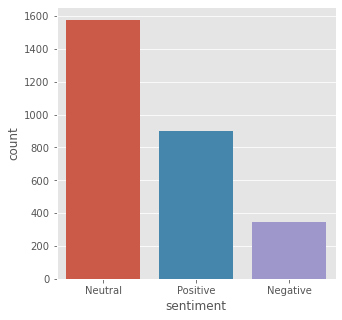

In [49]:
# Some visualisation to check counts
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data=Nike_df)

Text(0.5, 1.0, 'Distribution of Nike Sentiment')

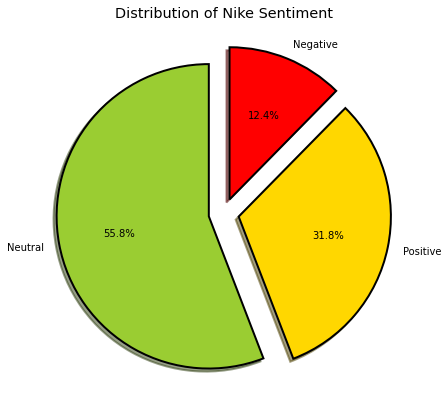

In [50]:
# Let's see each sentiment in a pie chart form.
fig = plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={'linewidth':2, 'edgecolor':"black"}
tags=Nike_df['sentiment'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90,wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Nike Sentiment')

In [51]:
# It's time to seperete positive tweets from negative tweets

In [52]:
pos_tweets=Nike_df[Nike_df.sentiment=='Positive']
pos_tweets=pos_tweets.sort_values(['Polarity'], ascending=False)
pos_tweets.head()

Unnamed: 0            author_id           author_name      screen_name  \
222          222  1487878411007586306  227's YouTube Chili'     Hoops227_CBB   
382          382           2294708612         Jamaal Al-Din     Hoops227_NFL   
1524        1524  1335470941359497216                  Wiwy  WillSan96521869   
2806        2806   760040275687243776                  KARA  RashikaMichelle   
3654        3655             12863122      Miguel Rodriguez     _TheNational   

                       location  followers_count  \
222                   Boise, ID               13   
382                   Boise, ID              137   
1524                        NaN               22   
2806  Indonesia - India - Korea              198   
3654               New York, NY             5000   

                                                   text  retweet_count  \
222      cbb best jaden ivey 227 youtub chili cbb spici              2   
382   nfl nba leader 299 ppg gianni best world talk ...              3   
1524         best thing robinhood get hole stake crypto              0   
2806  billi eilish best reaction btss jhope wear nik...            101   
3654  thank keep look best swooshlif nike airjordan1...              1   

      Polarity sentiment  Text_length  Text_word_count  
222        1.0  Positive           46                9  
382        1.0  Positive           94               18  
1524       1.0  Positive           42                7  
2806       1.0  Positive           55                9  
3654       1.0  Positive           59                9

In [53]:
# Let's import Image lib to open a saved file.
## Note: I have downloaded "brain.png" in the jupiter directory to visualise the words in a more meaningful way.
# I will attach this brain.png file in my coursework submission. When this file is run, please add the brain.png first to get results.
from PIL import Image
mask=np.array(Image.open("nike.png"))

In [54]:
# It's time to make wordclouds to analyse sentiments in a meaningful way.
# We will start it by using wordcloud library and then give it a form we want. I have chosen 500 at max to make words more 
# readable in the picture.
def create_wordcloud(text):
    mask=np.array(Image.open("nike.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=1000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


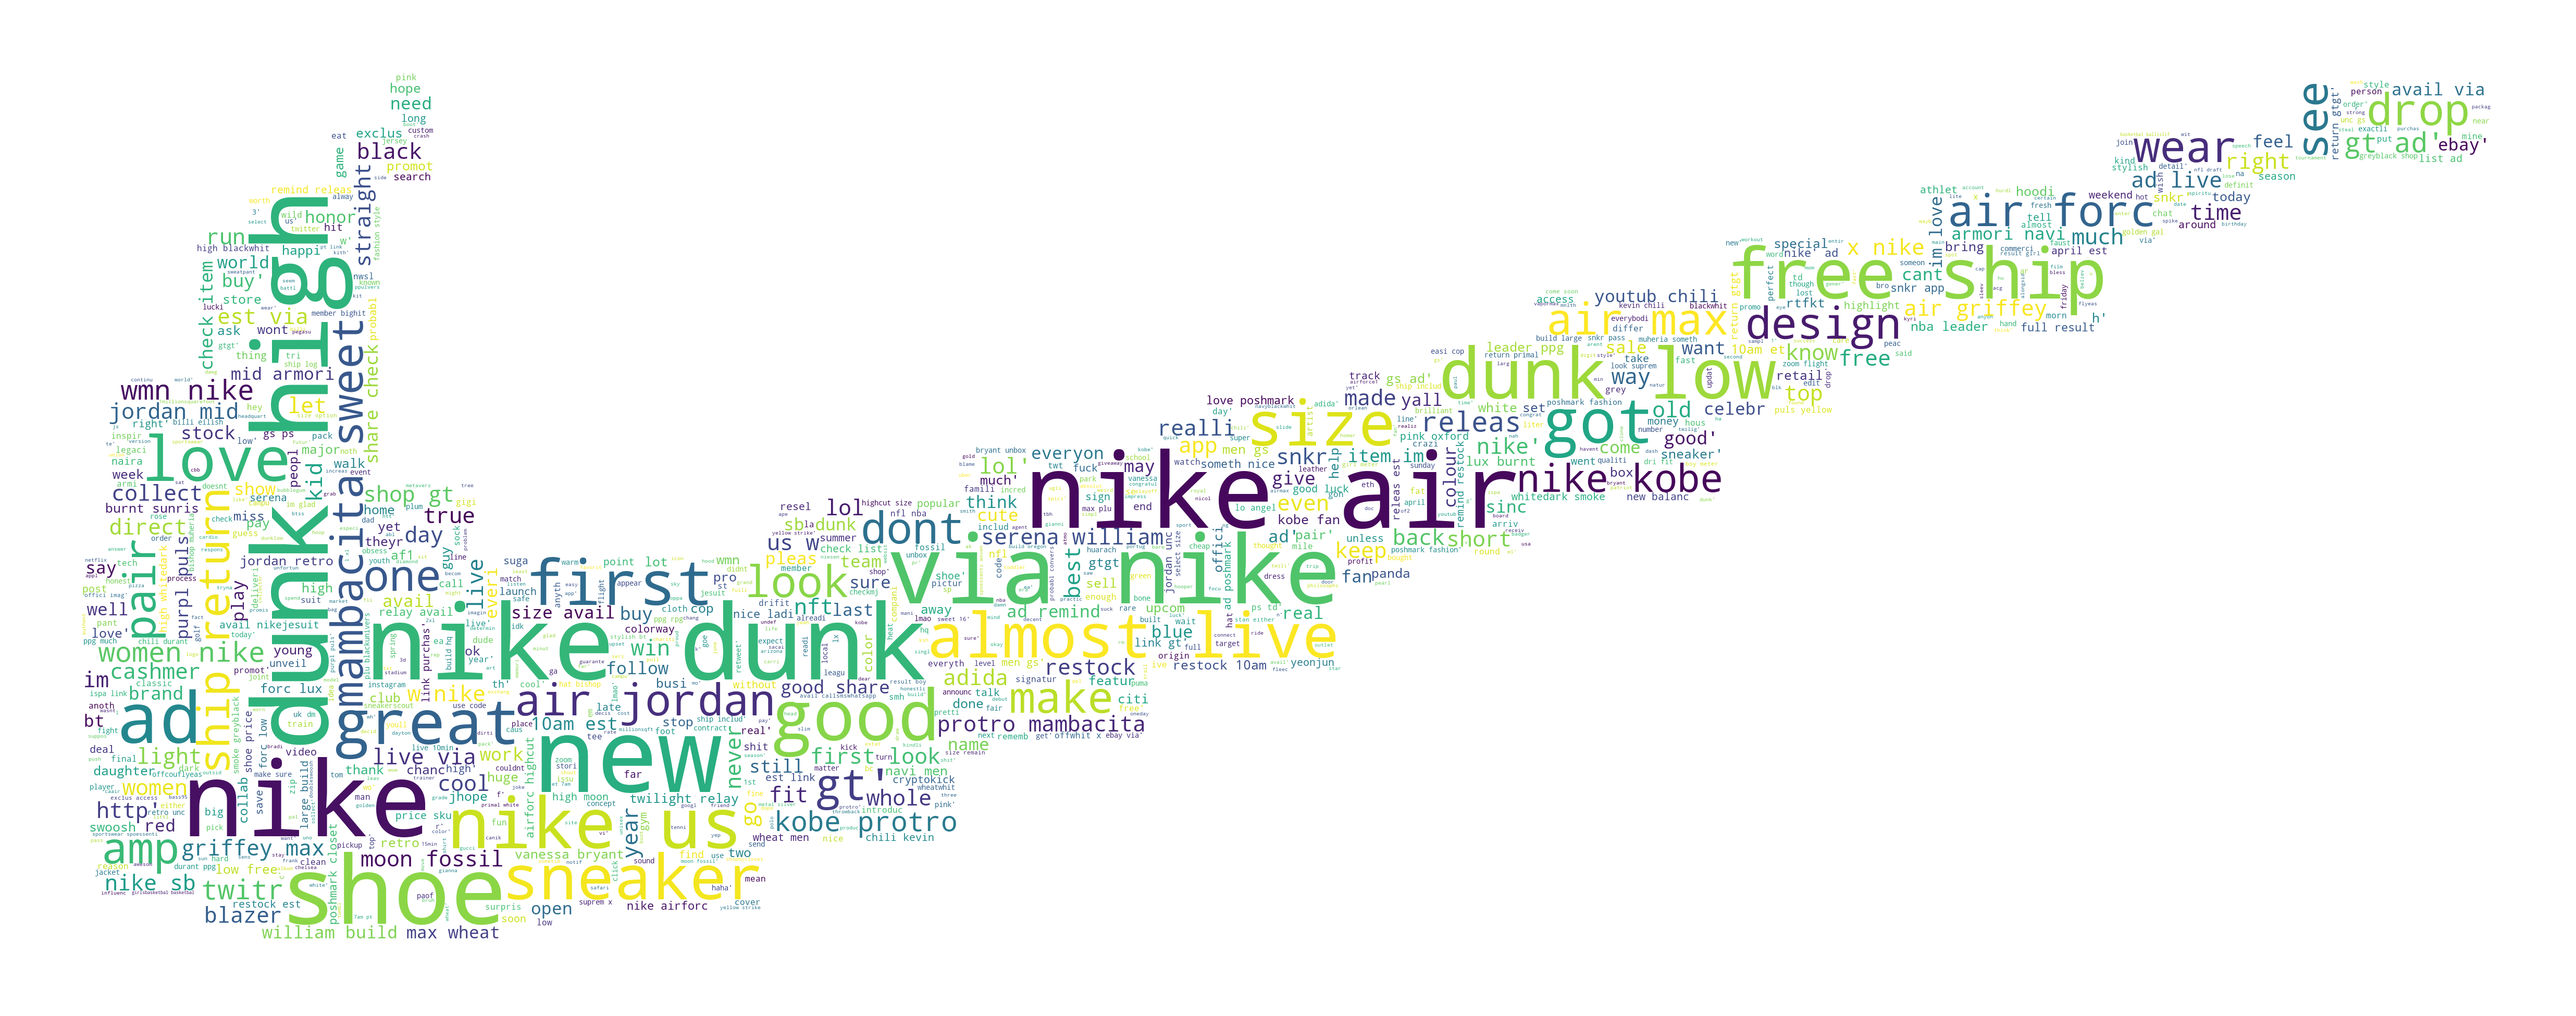

In [55]:
# Applying above function to get wordcloud of brain. It consists of positive tweets. Note, it gives the wrods which are most 
# repeating in the positive tweetrs. The higher the frequency of words,more visible as seem.
create_wordcloud(pos_tweets["text"].values)

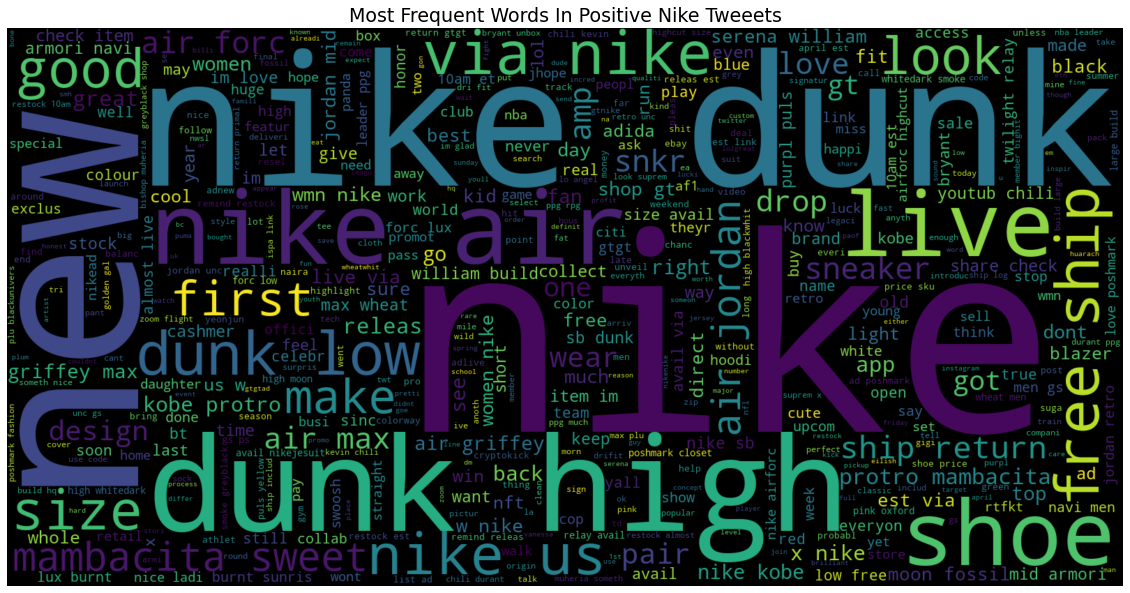

In [56]:
# I am adding two visualization to make it more interesing. 
text=''.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words In Positive Nike Tweeets', fontsize=19)
plt.show()

In [57]:
# It's time to make wordclouds to analyse sentiments in a meaningful way.
# We will start it by using wordcloud library and then give it a form we want. I have chosen 500 at max to make words more 
# readable in the picture.
def create_wordcloud1(text):
    mask=np.array(Image.open("twitter2.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=500,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [58]:
# Let's check negative tweets by creating another data frame with negative tweets.
neg_tweets=Nike_df[Nike_df.sentiment=='Negative']
neg_tweets=neg_tweets.sort_values(['Polarity'], ascending=False)
neg_tweets.head()

Unnamed: 0            author_id         author_name    screen_name  \
3263        3264           2484348455        Ryan Forsyth  rizzo_forsyth   
4893        4894  1439620500771192839             Numb :)     Prayy_Boyy   
3826        3827           1921142324        Sneaker Drop  SneakerDropCo   
2160        2160           2411226835  Ian Standley 🧘🏻‍♂️   IanStandley2   
3731        3732            506477063  Dan Raymond Moneda      D_defiler   

             location  followers_count  \
3263   Aragon Georgia              506   
4893      Mobile may              1476   
3826  San Antonio, TX            22530   
2160              NaN               84   
3731              NaN              160   

                                                   text  retweet_count  \
3263          nike mean werent worth damn ten miami fsu              0   
4893      aww doc zakir nike mean k kr sakti thank info              0   
3826  ad drop via nike us women nike dunk high white...              0   
2160   come soon nike dunk high dark beetroot wolf grey              2   
3731   nike dunk high w dark smoke grey via nike us buy              1   

      Polarity sentiment  Text_length  Text_word_count  
3263 -0.004167  Negative           41                8  
4893 -0.006250  Negative           45               10  
3826 -0.010000  Negative           69               15  
2160 -0.013333  Negative           48                9  
3731 -0.013333  Negative           48               11

Word Cloud Saved Successfully


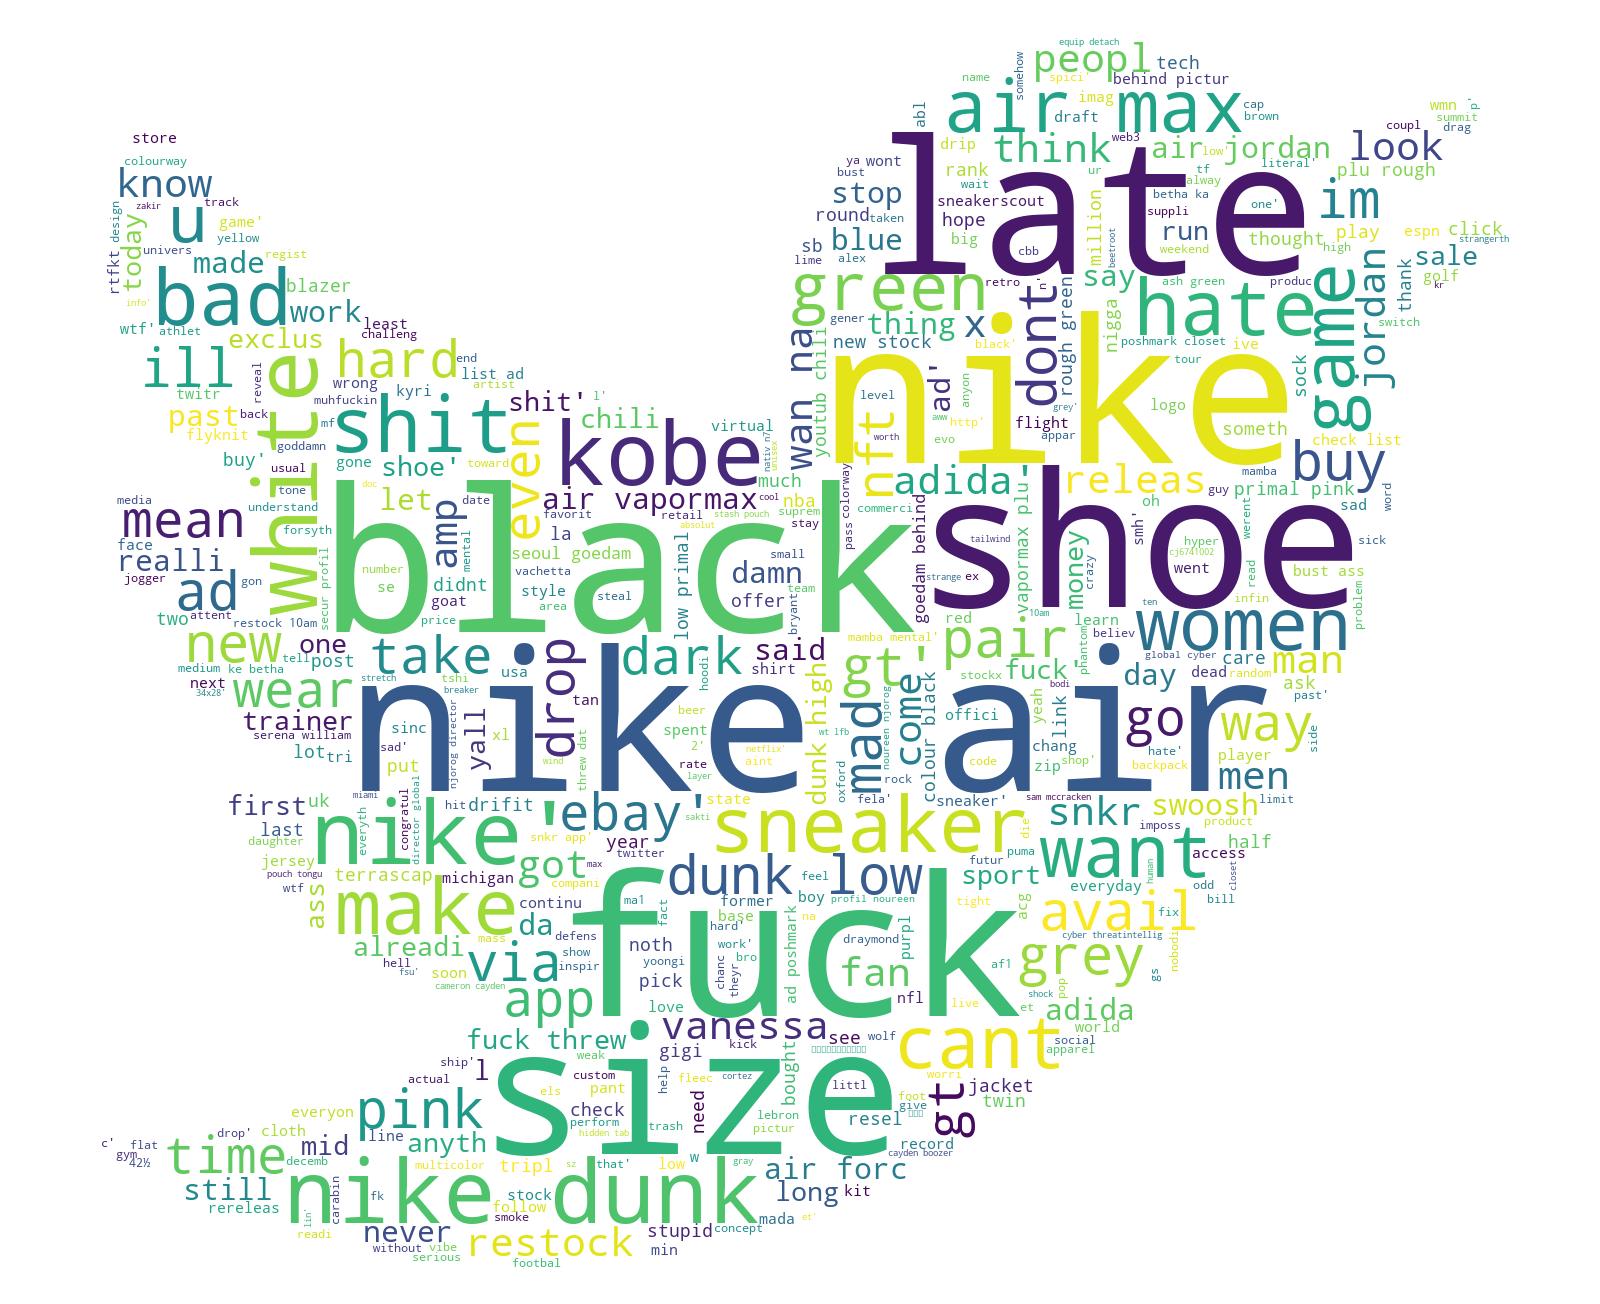

In [59]:
# Brain wordcloud of Negative Adidas tweets
create_wordcloud1(neg_tweets["text"].values)

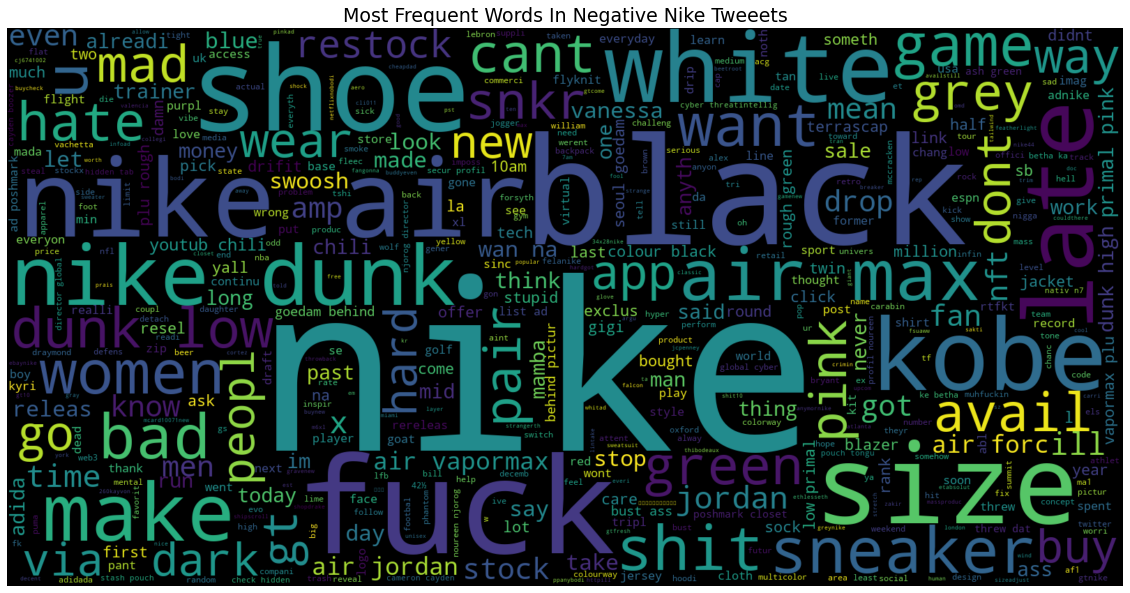

In [60]:
# Let's check another way of wordcloud to see 1000 common words. It may help in visualising more words.
text=''.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words In Negative Nike Tweeets', fontsize=19)
plt.show()

In [61]:
# It's time to make wordclouds to analyse sentiments in a meaningful way.
# We will start it by using wordcloud library and then give it a form we want. I have chosen 500 at max to make words more 
# readable in the picture.
def create_wordcloud2(text):
    mask=np.array(Image.open("brain.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=500,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [62]:
# Let's find out about neutral texts as well. They help us in making appealing advertisement to indecisive customers.
neu_tweets=Nike_df[Nike_df.sentiment=='Neutral']
neu_tweets=neu_tweets.sort_values(['Polarity'], ascending=False)
neu_tweets.head()

Unnamed: 0           author_id     author_name    screen_name  \
0              0          1006569229  Timothy Nelson  TimdianaJones   
3211        3212  916177899195129856        gomolemo       gselekee   
3209        3210           405181352   Jonathan Bane        jbane11   
3205        3206          3081525519       Athenkosi   siphosihle__   
3201        3202            51397822         vince m         VXNSEm   

                        location  followers_count  \
0                            NaN              128   
3211                         JHB              478   
3209                  Temple, TX              841   
3205  Johannesburg, South Africa              509   
3201                     E.PHX🏝🌵              552   

                                                   text  retweet_count  \
0                                 transform soccer ball              0   
3211                          serena william nike build              4   
3209  thedude11 how man suppos give peopl came see s...              0   
3205                 na let go back nike unfinish busin              0   
3201                                        hit everyth              0   

      Polarity sentiment  Text_length  Text_word_count  
0          0.0   Neutral           21                3  
3211       0.0   Neutral           25                4  
3209       0.0   Neutral           58               11  
3205       0.0   Neutral           34                7  
3201       0.0   Neutral           11                2

Word Cloud Saved Successfully


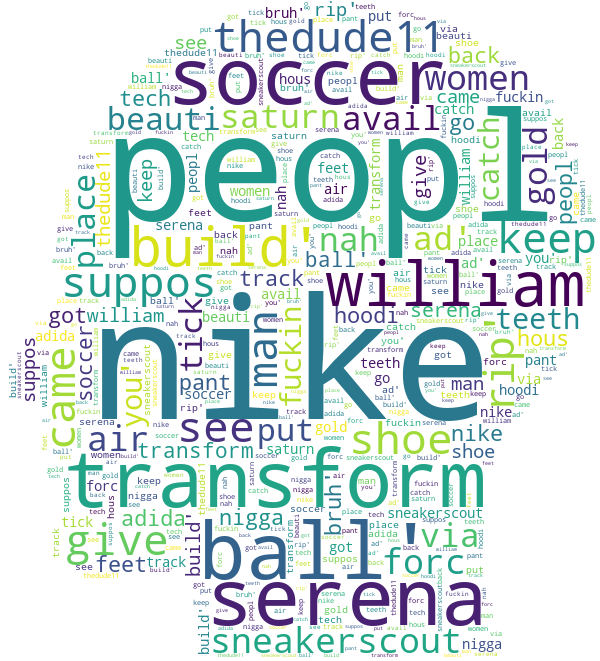

In [63]:
# Creating wordcloud of neutral texts
create_wordcloud2(neu_tweets["text"].values)

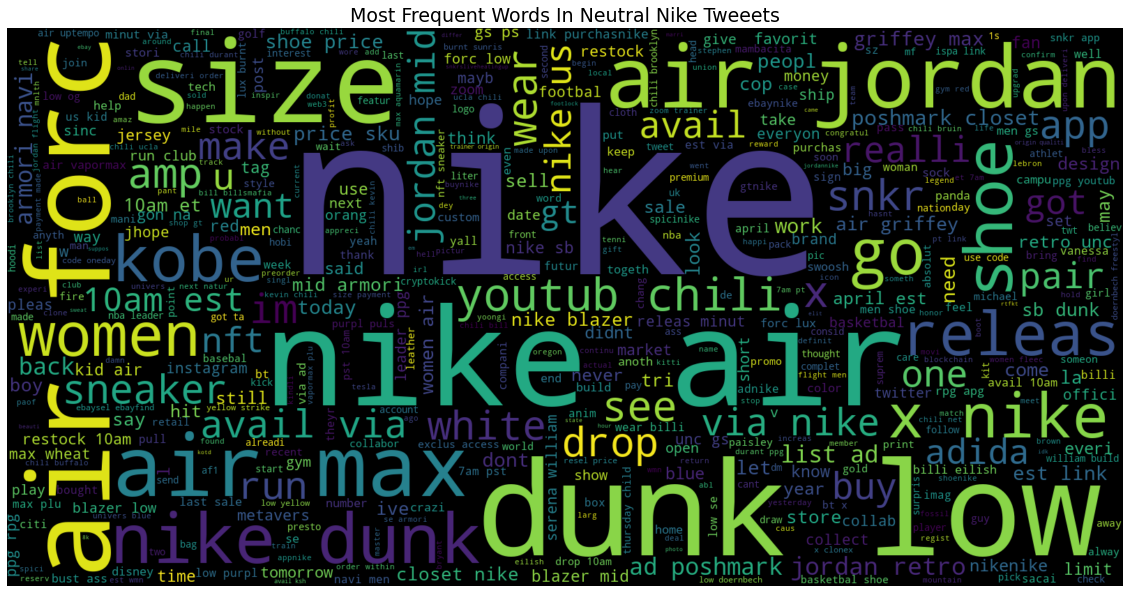

In [64]:
text=''.join([word for word in neu_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words In Neutral Nike Tweeets', fontsize=19)
plt.show()

In [65]:
# Let's do Topic Anlaytics by counting how much times a word apprears.
tweet_corpus_pos=[]         
for msg in pos_tweets[(pos_tweets["sentiment"]=='Positive')]["text"].tolist():
    for word in msg.split():
        tweet_corpus_pos.append(word)
from collections import Counter
pd.DataFrame(Counter(tweet_corpus_pos).most_common(20),columns=["Words","Count"])

Words  Count
0   nike    649
1    new    156
2   dunk    133
3     ad    109
4    air    106
5   high     89
6   live     84
7      1     80
8   free     69
9   good     68
10   via     67
11   low     66
12    gt     63
13  size     57
14  shoe     57
15  love     56
16    us     55
17  kobe     50
18  like     49
19   get     48

C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


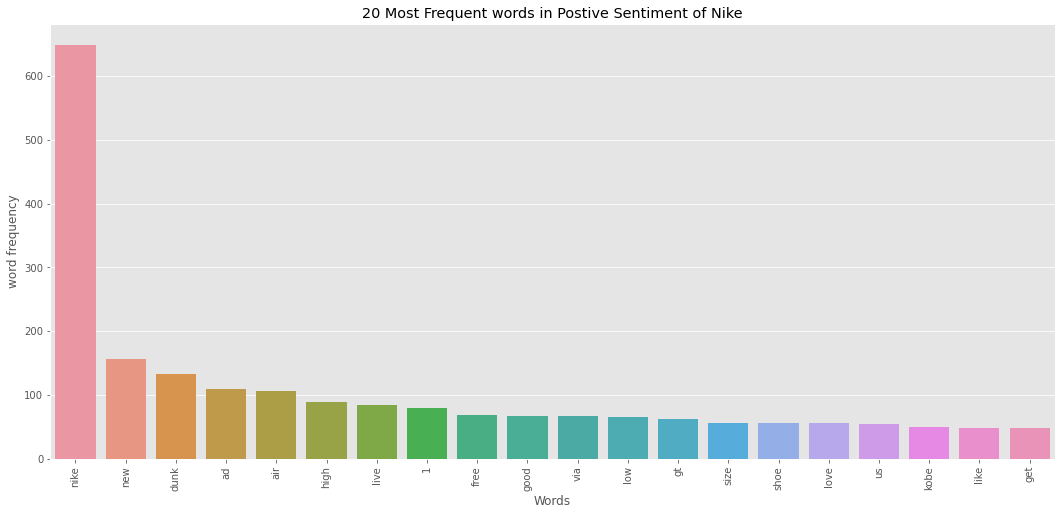

In [66]:
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_pos).most_common(20))[0],pd.DataFrame(Counter(tweet_corpus_pos).most_common(20))[1])
plt.xlabel("Words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.title('20 Most Frequent words in Postive Sentiment of Nike')
plt.show()

In [67]:
# COUNT MOST NUMBER OF WORDS IN NEGATIVE SENTIMENTS
# Let's do Topic Anlaytics by counting how much times a word apprears.
tweet_corpus_neg=[]         
for msg in neg_tweets[(neg_tweets["sentiment"]=='Negative')]["text"].tolist():
    for word in msg.split():
        tweet_corpus_neg.append(word)
from collections import Counter
pd.DataFrame(Counter(tweet_corpus_neg).most_common(20),columns=["Words","Count"])

Words  Count
0      nike    247
1     black     47
2       air     45
3      fuck     44
4      shoe     29
5       get     28
6      dunk     26
7      late     25
8        ad     23
9      size     23
10      low     21
11     shit     21
12       gt     20
13     like     20
14    green     20
15  sneaker     19
16    white     18
17      max     17
18     kobe     17
19     pink     17

C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


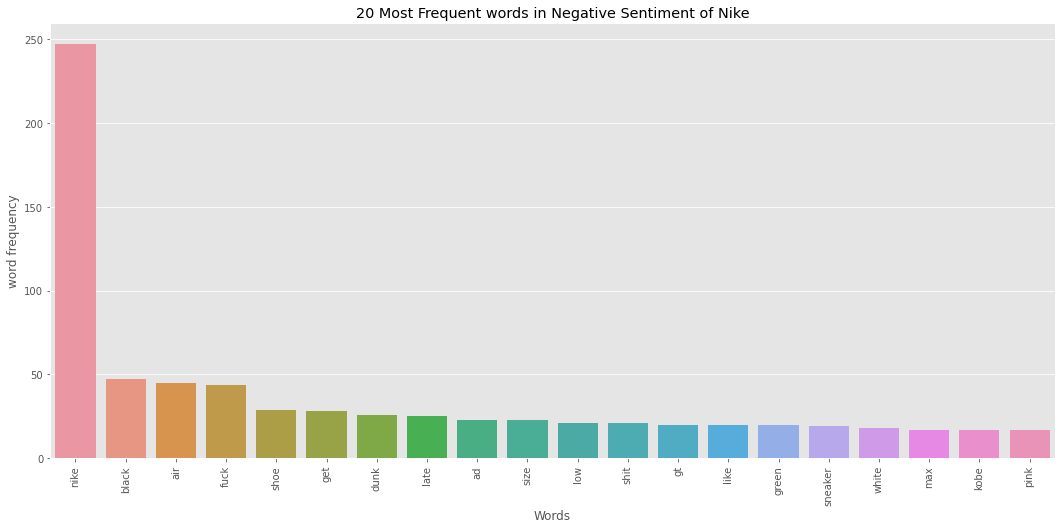

In [68]:
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_neg).most_common(20))[0],pd.DataFrame(Counter(tweet_corpus_neg).most_common(20))[1])
plt.xlabel("Words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.title('20 Most Frequent words in Negative Sentiment of Nike')
plt.show()

In [69]:
# Let's do Topic Anlaytics by counting how much times a word apprears.
tweet_corpus_neu=[]         
for msg in neu_tweets[(neu_tweets["sentiment"]=='Neutral')]["text"].tolist():
    for word in msg.split():
        tweet_corpus_neu.append(word)
from collections import Counter
pd.DataFrame(Counter(tweet_corpus_neu).most_common(20),columns=["Words","Count"])

Words  Count
0      nike   1054
1       air    241
2      dunk    129
3         1    125
4       low    122
5        ad    116
6      shoe     99
7    jordan     93
8       via     91
9         x     89
10      max     77
11     size     76
12    women     72
13     like     70
14    avail     69
15    chili     69
16     forc     65
17   releas     64
18       us     60
19  sneaker     59

C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


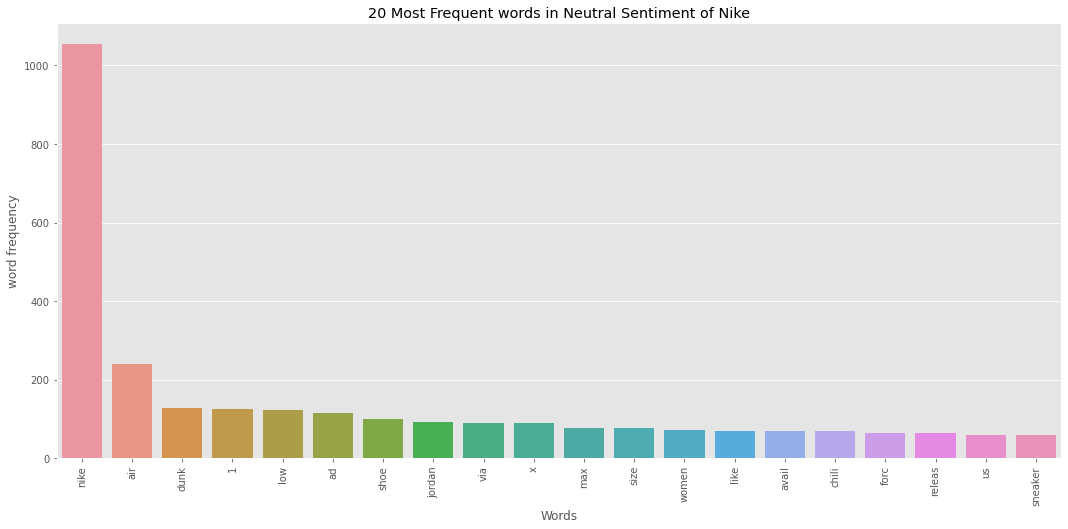

In [70]:
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_neu).most_common(20))[0],pd.DataFrame(Counter(tweet_corpus_neu).most_common(20))[1])
plt.xlabel("Words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.title('20 Most Frequent words in Neutral Sentiment of Nike')
plt.show()

In [71]:
# Let's see the ten largest influencers with higherst followers count
pos_tweets.nlargest(10,'followers_count')

Unnamed: 0   author_id   author_name  screen_name            location  \
1905        1905   701725963       NowThis  nowthisnews  The Internet & NYC   
5181        5182    16180874  Sneaker News  SneakerNews                 NYC   
2968        2968    16180874  Sneaker News  SneakerNews                 NYC   
2970        2970    16180874  Sneaker News  SneakerNews                 NYC   
2960        2960    16180874  Sneaker News  SneakerNews                 NYC   
3738        3739    18286505     HYPEBEAST    HYPEBEAST                 NaN   
1504        1504  2698270332     SOLELINKS    SOLELINKS       San Diego, CA   
3090        3091  2698270332     SOLELINKS    SOLELINKS       San Diego, CA   
4402        4403  2698270332     SOLELINKS    SOLELINKS       San Diego, CA   
3574        3575  2698270332     SOLELINKS    SOLELINKS       San Diego, CA   

      followers_count                                               text  \
1905          2740226  nike honor serena william 1 millionsqft build ...   
5181          1160945  ad avail via lvr eu w nike air max 90 lucki ch...   
2968          1160944  ad live via nike us w nike dunk high blackwhit...   
2970          1160944  ad new via nike us nike air max plu blackunive...   
2960          1160944  ad live via nike us w nike dunk low 110 free s...   
3738           891032  nike sun club dunk low henna set summer golden...   
1504           729368  ad nike air flight lite mid scotti pippen sale...   
3090           728547   ad straight canik air griffey max 1 wheat men gs   
4402           728547  ad restock 10am et women nike dunk high cashme...   
3574           728547  ad new nike offcouflyeas slide blackwhit drop ...   

      retweet_count  Polarity sentiment  Text_length  Text_word_count  
1905             17  0.136364  Positive           80               14  
5181              2  0.400000  Positive           86               19  
2968              2  0.232121  Positive           74               16  
2970              2  0.178788  Positive           79               16  
2960              2  0.134091  Positive           79               17  
3738              1  0.150000  Positive           51               10  
1504              5  0.200000  Positive           78               16  
3090              0  0.200000  Positive           48               10  
4402              3  0.160000  Positive           59               11  
3574              0  0.136364  Positive           60               11

In [72]:
# Micro influencers have less than 100,000 followers.
micro_influencers=pos_tweets.loc[pos_tweets['followers_count']<100000,['author_id','author_name','screen_name',"followers_count",'location',
                                                                          'retweet_count']]

In [73]:
micro_influencers_lower=micro_influencers.loc[pos_tweets['followers_count']>10000,['author_id','author_name','screen_name',"followers_count",'location',
                                                                          'retweet_count']]

In [74]:
print("The number of users with followers count between 10,000 and 100,000 :", micro_influencers_lower.followers_count.nunique())

The number of users with followers count between 10,000 and 100,000 : 36


In [75]:
#Top 20 from micro_influencers
top_20_micro_inf=micro_influencers.nlargest(20,'followers_count')

In [76]:
top_20_micro_inf.head(20)

author_id         author_name      screen_name  \
3781          1411447658    MoreSneakers.com    more_sneakers   
2780          2753918854        SneakerAlert   SneakerAlertHD   
3875          2753918854        SneakerAlert   SneakerAlertHD   
4224          2753918854        SneakerAlert   SneakerAlertHD   
89             107506412               nic b     NicoleBehnam   
3687            82669742  Forbes SportsMoney     ForbesSports   
5158  989130497593892864          FitThemAll       FitThemAll   
3769           337949229       The Drop Date      thedropdate   
371            496534843            Heskicks         Heskicks   
1698            19166206    Operation Sports  OperationSports   
2126          4851461892  Kicks Deals Canada     KicksDealsCA   
1579          4851461892  Kicks Deals Canada     KicksDealsCA   
975           1154885816  DeadLaced Sneakers        DeadLaced   
801           1154885816  DeadLaced Sneakers        DeadLaced   
620           1154885816  DeadLaced Sneakers        DeadLaced   
2606            61228972   Graffiti New York          at149st   
5270            32479849          Evan Flood       Evan_Flood   
5272            32479849          Evan Flood       Evan_Flood   
3860           506463474  LOVE COMES FIRST 🌹    loveboatpromo   
3410           513574059                Mark    FintwitPeaked   

      followers_count                      location  retweet_count  
3781            84713     Paris, France / Worldwide              0  
2780            77096                 United States              0  
3875            77096                 United States              0  
4224            77096                 United States              0  
89              71863                 United States              0  
3687            70039                           NaN              0  
5158            66361                           NaN              0  
3769            62523                United Kingdom              1  
371             53289                           NaN              0  
1698            49699  Facebook.com/OperationSports              0  
2126            48037                        CANADA              0  
1579            48037                        CANADA              0  
975             47045               New Jersey, USA              0  
801             47045               New Jersey, USA              0  
620             47045               New Jersey, USA              0  
2606            37118                 New York City              0  
5270            33441               Sun Prairie, WI              0  
5272            33441               Sun Prairie, WI              1  
3860            29903    Johannesburg, South Africa             27  
3410            28598                           NaN              0

In [77]:
Nike_df1.loc[Nike_df1['author_name']=='nic b',['author_name','screen_name','location','text']]

author_name   screen_name       location  \
89       nic b  NicoleBehnam  United States   

                                            text  
89  @HighwaterKyle I love Nike. Just an example.

Text(0.5, 1.0, 'Location of Top 20 Micro influencers')

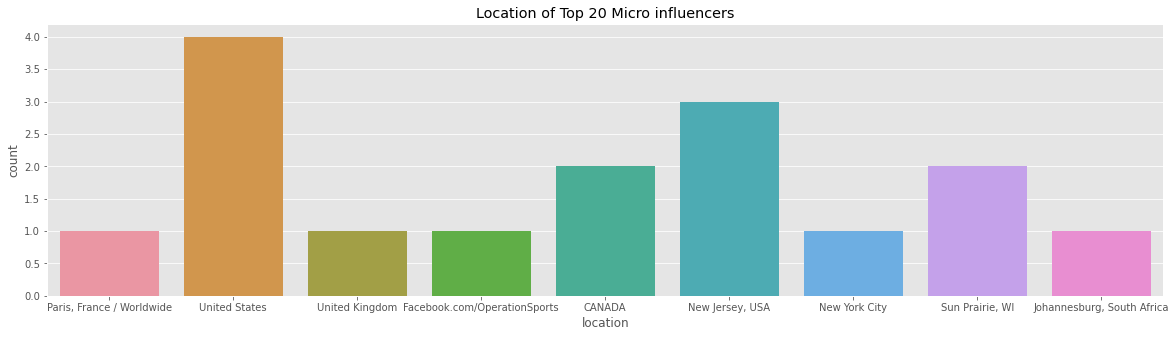

In [80]:
fig = plt.figure(figsize=(20,5))
sns.countplot(x='location', data=top_20_micro_inf)
plt.title("Location of Top 20 Micro influencers")

In [81]:
# Let's prepare data text columns for machine learning tasks which only understnad numbers.
vect=CountVectorizer(ngram_range=(1,2)).fit(Nike_df['text'])

In [82]:
feature_names = vect.get_feature_names()
print('Number of features:{}\n'.format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))

Number of features:20758

First 20 features:
['000', '000 brand', '001', '001 shoe', '0011', '0011 eth', '002', '011', '011 fuck', '015', '015 black', '02', '02 bass95', '02 lol', '021', '021 sneaker', '03', '03 crew', '0321', '0321 nike']


C:\Users\balaj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [83]:
# Selecing input and outpout features for applying classification models.
X=Nike_df['text']
y=Nike_df['sentiment']
X=vect.transform(X)

In [84]:
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [85]:
print('size of x_train:', (x_train.shape))
print('size of y_train:', (y_train.shape))
print('size of x_test:', (x_test.shape))
print('size of x_test:', (x_test.shape))

size of x_train: (2259, 20758)
size of y_train: (2259,)
size of x_test: (565, 20758)
size of x_test: (565, 20758)


In [86]:
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred=logreg.predict(x_test)
logreg_acc=accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.66%


In [87]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 26  29   5]
 [  1 328   1]
 [  3  42 130]]


              precision    recall  f1-score   support

    Negative       0.87      0.43      0.58        60
     Neutral       0.82      0.99      0.90       330
    Positive       0.96      0.74      0.84       175

    accuracy                           0.86       565
   macro avg       0.88      0.72      0.77       565
weighted avg       0.87      0.86      0.85       565



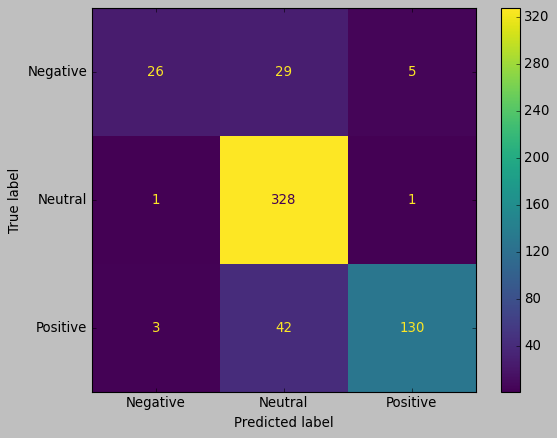

In [88]:
style.use('classic')
cm=confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [89]:
# LET'S apply different methods to perform hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid =GridSearchCV(LogisticRegression(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [90]:
print("Best Parameters:",grid.best_params_)

Best Parameters: {'C': 10}


In [91]:
y_pred=grid.predict(x_test)

In [92]:
logreg_acc=accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.43%


In [93]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 28  26   6]
 [  1 328   1]
 [  3  34 138]]


              precision    recall  f1-score   support

    Negative       0.88      0.47      0.61        60
     Neutral       0.85      0.99      0.91       330
    Positive       0.95      0.79      0.86       175

    accuracy                           0.87       565
   macro avg       0.89      0.75      0.79       565
weighted avg       0.88      0.87      0.87       565



In [94]:
# Let's apply linear support vector machine
from sklearn.svm import LinearSVC

In [95]:
SVCmodel=LinearSVC()
SVCmodel.fit(x_train,y_train)

LinearSVC()

In [96]:
svc_pred=SVCmodel.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("Test Accuracy: {:.2f}%".format(svc_acc*100))

Test Accuracy: 87.43%


In [97]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[ 29  26   5]
 [  1 326   3]
 [  3  33 139]]


              precision    recall  f1-score   support

    Negative       0.88      0.48      0.62        60
     Neutral       0.85      0.99      0.91       330
    Positive       0.95      0.79      0.86       175

    accuracy                           0.87       565
   macro avg       0.89      0.76      0.80       565
weighted avg       0.88      0.87      0.87       565



In [98]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

C:\Users\balaj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\balaj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\balaj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\balaj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\balaj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [99]:
print("Best Parameter:", grid.best_params_)

Best Parameter: {'C': 10}


In [100]:
y_pred=grid.predict(x_test)

In [101]:
logreg_acc=accuracy_score(y_pred,y_test)
print('Test accuracy: {:.2f}%'.format(logreg_acc*100))

Test accuracy: 87.43%


In [102]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test,y_pred))


[[ 30  25   5]
 [  1 325   4]
 [  3  33 139]]


              precision    recall  f1-score   support

    Negative       0.88      0.50      0.64        60
     Neutral       0.85      0.98      0.91       330
    Positive       0.94      0.79      0.86       175

    accuracy                           0.87       565
   macro avg       0.89      0.76      0.80       565
weighted avg       0.88      0.87      0.87       565



In [103]:
from sklearn.ensemble import RandomForestClassifier
rf_cl=RandomForestClassifier()
rf_cl.fit(x_train, y_train)
rf_pred=rf_cl.predict(x_test)
rf_acc=accuracy_score(rf_pred, y_test)

In [104]:
print("The accuracy for random forst model is ", rf_acc)

The accuracy for random forst model is  0.8955752212389381


Text(0.5, 1.0, 'Model Accuracy Comparsion')

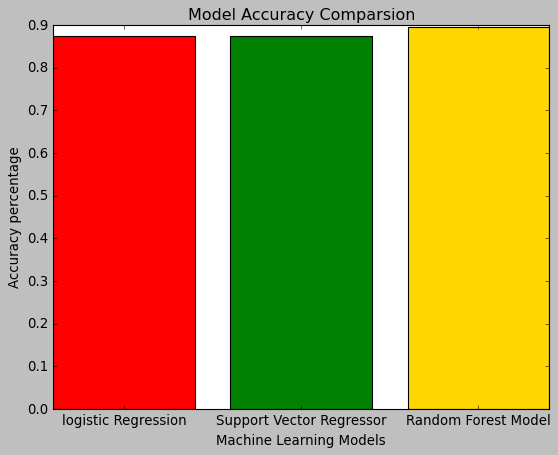

In [105]:
X = ['logistic Regression', 'Support Vector Regressor', 'Random Forest Model']
Y = [ logreg_acc, svc_acc, rf_acc]
plt.bar(X,Y, color=['red','green','gold'])
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy percentage")
plt.title('Model Accuracy Comparsion')